# Self Organising Maps
This unsupervised deep learning model will do customer segmentation and identify customers that cheated.

Input space and output spaces, each neuron will have the dimension of 15 elements of our customer (customer id + 14 attributes)

Neuron closes to the customer is called the winning node and is the most similar node to the customer. 

Gaussian neighborhood function to move them closer to the point. Outliers is fraud

Mean interneuron distance (MID), neighbourhood defined using mean eucleadian distance.

[Australian Credit Approval Dataset](https://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval))

## Import libaries

In [14]:
#data handling
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#feature scaling
from sklearn.preprocessing import MinMaxScaler

#prebuilt self organising maps
from minisom import MiniSom

#vis som
from pylab import bone, pcolor, colorbar, plot, show

## Import datasets

In [5]:
dataset = pd.read_csv('dataset\Credit_Card_Applications.csv')

In [6]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Split and Feature Scale data

In [7]:
#split dataset into two subsets (X and y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
#we need feature scaling.
sc = MinMaxScaler(feature_range =  (0, 1)) #between zero and one
X = sc.fit_transform(X)

## Training the SOM

In [13]:

# we will use a prebuilt SOM called miniSOM, https://github.com/JustGlowing/minisom
# pip install minisom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Plot SOM

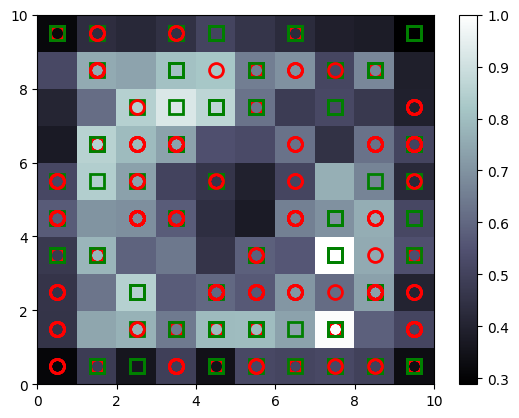

In [18]:
bone()#create a blank window
pcolor(som.distance_map().T) # get the transpose of the distance map
colorbar() #gives a scale or range of distances (feature scaled) white are fraud!
#red circle who didn't get approval, green sqaure if they did get approval

markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x) #winning node
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor=colors[y[i]], 
         markerfacecolor='None', 
         markersize=10, 
         markeredgewidth=2)
show()


## Get list of fraudsters

In [35]:
mappings = som.win_map(X)
fraud = np.concatenate((mappings[(7,1)], mappings[(7,3)]), axis = 0)
fraud = sc.inverse_transform(fraud)

In [37]:
print('Fraud Customer IDs')
for i in fraud[:, 0]:
  print(int(i))

Fraud Customer IDs
15644446
15585892
15609356
15803378
15714087
15588123
15672432
15583680
15730793
15572390
15566495
15663194
15746995
15725028
15764444
15731989
15631693
15671534
15777893
15613699
15667460
15569394
15773421
15682686
15707602
15598614
15712483
